In [37]:
import os
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
import torch.optim as optimizers
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets
import torchvision.transforms as transforms 
from callback import EarlyStopping
from sklearn.metrics import classification_report

In [56]:
class BiRNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__() 
        self.l1 = nn.LSTM(1463, hidden_dim, batch_first=True, bidirectional=True)
        self.l2 = nn.LSTM(hidden_dim*2, hidden_dim, batch_first=True, bidirectional=True)
        self.l3 = nn.Linear(hidden_dim*2, 2) 

        nn.init.xavier_normal_(self.l1.weight_ih_l0) 
        nn.init.orthogonal_(self.l1.weight_hh_l0)
        nn.init.xavier_normal_(self.l2.weight_ih_l0) 
        nn.init.orthogonal_(self.l2.weight_hh_l0)
         
        nn.init.xavier_normal_(self.l3.weight) 

    def forward(self, x):
        h, _ = self.l1(x) 
        h, _ = self.l2(h) 
        y = self.l3(h)
        y = F.softmax(y, dim=1)
        return y

In [57]:
def clean(df):
    #共通で不要
    col = ['start(exchange)[ms]', 'end(system)[ms]', 'end(exchange)[ms]',\
    'kinectstart(exchange)[ms]', 'kinectend(system)[ms]',\
    'kinectend(exchange)[ms]', 'SS_ternary', 'TC_ternary', 'TS_ternary', 'SS',\
    'TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TS1', 'TS2', 'TS3', 'TS4', 'TS5',
    ]

    res = []
    
    for data in df:
        res.append(torch.from_numpy(data.drop(col, axis=1).values))

    return res

In [58]:
def louocv(files, testfile):

    train_df = []
    test_df = []


    for file in files:
        if file == testfile:
            test_df.append(pd.read_csv(file))
        else:
            train_df.append(pd.read_csv(file))

    return train_df, test_df

In [59]:
def make_target(df):
    res = [] 

    for data in df:
        tmp = data.loc[:, 'TS1':'TS5'].sum(axis=1) > 20
        res.append(tmp.astype('int'))
    return res

In [60]:
def make_scaler(datas):
    scaler = StandardScaler() 
    scaler.fit(datas[0])
    return scaler 

In [61]:
def standardize(datas, scaler):
    res = []
    for data in datas:
        res.append(scaler.transform(data).tolist())
    return res

1人目
epoch: 1, loss: 0.649, acc: 0.650, val_loss: 0.63, val_acc: 0.632
epoch: 2, loss: 0.568, acc: 0.742, val_loss: 0.596, val_acc: 0.699
epoch: 3, loss: 0.515, acc: 0.791, val_loss: 0.575, val_acc: 0.722
epoch: 4, loss: 0.474, acc: 0.842, val_loss: 0.629, val_acc: 0.664
epoch: 5, loss: 0.476, acc: 0.829, val_loss: 0.552, val_acc: 0.768
epoch: 6, loss: 0.47, acc: 0.836, val_loss: 0.587, val_acc: 0.698
epoch: 7, loss: 0.445, acc: 0.867, val_loss: 0.582, val_acc: 0.702
epoch: 8, loss: 0.4, acc: 0.919, val_loss: 0.56, val_acc: 0.733
epoch: 9, loss: 0.383, acc: 0.936, val_loss: 0.557, val_acc: 0.743
epoch: 10, loss: 0.374, acc: 0.942, val_loss: 0.555, val_acc: 0.748
epoch: 11, loss: 0.356, acc: 0.963, val_loss: 0.612, val_acc: 0.688
early stopping


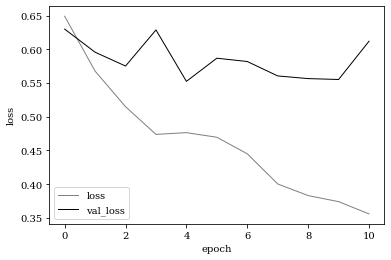

test_loss: 0.586, test_acc: 0.721
2人目
epoch: 1, loss: 0.637, acc: 0.634, val_loss: 0.649, val_acc: 0.636
epoch: 2, loss: 0.546, acc: 0.757, val_loss: 0.601, val_acc: 0.695
epoch: 3, loss: 0.499, acc: 0.818, val_loss: 0.601, val_acc: 0.702
epoch: 4, loss: 0.456, acc: 0.856, val_loss: 0.578, val_acc: 0.715
epoch: 5, loss: 0.424, acc: 0.897, val_loss: 0.592, val_acc: 0.708
epoch: 6, loss: 0.42, acc: 0.891, val_loss: 0.6, val_acc: 0.706
epoch: 7, loss: 0.395, acc: 0.924, val_loss: 0.605, val_acc: 0.697
epoch: 8, loss: 0.399, acc: 0.917, val_loss: 0.592, val_acc: 0.701
epoch: 9, loss: 0.376, acc: 0.938, val_loss: 0.582, val_acc: 0.722
epoch: 10, loss: 0.369, acc: 0.950, val_loss: 0.578, val_acc: 0.716
early stopping


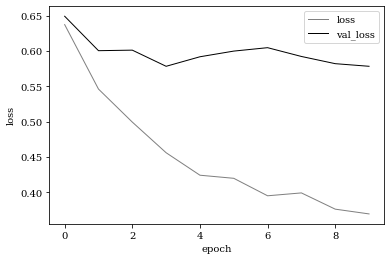

test_loss: 0.567, test_acc: 0.737
3人目
epoch: 1, loss: 0.623, acc: 0.643, val_loss: 0.605, val_acc: 0.691
epoch: 2, loss: 0.532, acc: 0.771, val_loss: 0.566, val_acc: 0.729
epoch: 3, loss: 0.494, acc: 0.816, val_loss: 0.549, val_acc: 0.765
epoch: 4, loss: 0.471, acc: 0.843, val_loss: 0.554, val_acc: 0.743
epoch: 5, loss: 0.468, acc: 0.842, val_loss: 0.623, val_acc: 0.665
epoch: 6, loss: 0.474, acc: 0.834, val_loss: 0.557, val_acc: 0.742
epoch: 7, loss: 0.45, acc: 0.860, val_loss: 0.575, val_acc: 0.708
epoch: 8, loss: 0.417, acc: 0.903, val_loss: 0.562, val_acc: 0.731
epoch: 9, loss: 0.389, acc: 0.929, val_loss: 0.546, val_acc: 0.758
epoch: 10, loss: 0.367, acc: 0.950, val_loss: 0.556, val_acc: 0.742
epoch: 11, loss: 0.356, acc: 0.958, val_loss: 0.567, val_acc: 0.731
epoch: 12, loss: 0.352, acc: 0.966, val_loss: 0.56, val_acc: 0.739
epoch: 13, loss: 0.355, acc: 0.961, val_loss: 0.558, val_acc: 0.744
epoch: 14, loss: 0.35, acc: 0.965, val_loss: 0.564, val_acc: 0.736
epoch: 15, loss: 0.35,

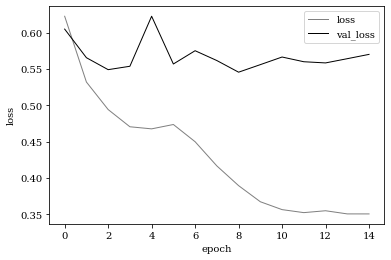

test_loss: 0.618, test_acc: 0.650
4人目
epoch: 1, loss: 0.631, acc: 0.661, val_loss: 0.625, val_acc: 0.645
epoch: 2, loss: 0.535, acc: 0.778, val_loss: 0.586, val_acc: 0.704
epoch: 3, loss: 0.496, acc: 0.810, val_loss: 0.602, val_acc: 0.702
epoch: 4, loss: 0.497, acc: 0.809, val_loss: 0.579, val_acc: 0.730
epoch: 5, loss: 0.454, acc: 0.861, val_loss: 0.604, val_acc: 0.690
epoch: 6, loss: 0.442, acc: 0.871, val_loss: 0.572, val_acc: 0.730
epoch: 7, loss: 0.419, acc: 0.891, val_loss: 0.572, val_acc: 0.730
epoch: 8, loss: 0.394, acc: 0.920, val_loss: 0.578, val_acc: 0.724
epoch: 9, loss: 0.378, acc: 0.936, val_loss: 0.593, val_acc: 0.703
epoch: 10, loss: 0.356, acc: 0.959, val_loss: 0.604, val_acc: 0.686
epoch: 11, loss: 0.362, acc: 0.956, val_loss: 0.573, val_acc: 0.728
epoch: 12, loss: 0.351, acc: 0.964, val_loss: 0.575, val_acc: 0.716
early stopping


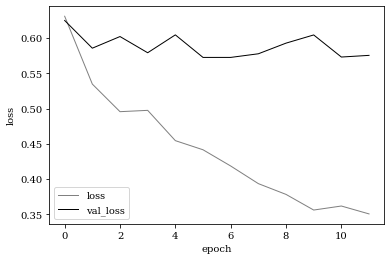

test_loss: 0.453, test_acc: 0.854
5人目
epoch: 1, loss: 0.641, acc: 0.634, val_loss: 0.693, val_acc: 0.578
epoch: 2, loss: 0.55, acc: 0.761, val_loss: 0.614, val_acc: 0.679
epoch: 3, loss: 0.512, acc: 0.797, val_loss: 0.588, val_acc: 0.720
epoch: 4, loss: 0.488, acc: 0.822, val_loss: 0.603, val_acc: 0.700
epoch: 5, loss: 0.45, acc: 0.864, val_loss: 0.605, val_acc: 0.689
epoch: 6, loss: 0.431, acc: 0.880, val_loss: 0.575, val_acc: 0.729
epoch: 7, loss: 0.425, acc: 0.886, val_loss: 0.593, val_acc: 0.702
epoch: 8, loss: 0.398, acc: 0.920, val_loss: 0.609, val_acc: 0.684
epoch: 9, loss: 0.398, acc: 0.918, val_loss: 0.566, val_acc: 0.726
epoch: 10, loss: 0.374, acc: 0.946, val_loss: 0.59, val_acc: 0.704
epoch: 11, loss: 0.36, acc: 0.954, val_loss: 0.585, val_acc: 0.710
epoch: 12, loss: 0.343, acc: 0.973, val_loss: 0.576, val_acc: 0.724
epoch: 13, loss: 0.338, acc: 0.977, val_loss: 0.598, val_acc: 0.705
epoch: 14, loss: 0.327, acc: 0.989, val_loss: 0.569, val_acc: 0.737
epoch: 15, loss: 0.323,

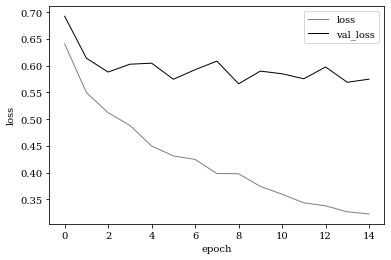

test_loss: 0.584, test_acc: 0.681
6人目
epoch: 1, loss: 0.635, acc: 0.632, val_loss: 0.678, val_acc: 0.610
epoch: 2, loss: 0.552, acc: 0.754, val_loss: 0.639, val_acc: 0.636
epoch: 3, loss: 0.491, acc: 0.833, val_loss: 0.634, val_acc: 0.653
epoch: 4, loss: 0.448, acc: 0.871, val_loss: 0.6, val_acc: 0.690
epoch: 5, loss: 0.41, acc: 0.912, val_loss: 0.595, val_acc: 0.708
epoch: 6, loss: 0.412, acc: 0.899, val_loss: 0.598, val_acc: 0.707
epoch: 7, loss: 0.402, acc: 0.912, val_loss: 0.633, val_acc: 0.659
epoch: 8, loss: 0.399, acc: 0.915, val_loss: 0.593, val_acc: 0.705
epoch: 9, loss: 0.36, acc: 0.958, val_loss: 0.602, val_acc: 0.690
epoch: 10, loss: 0.344, acc: 0.972, val_loss: 0.641, val_acc: 0.629
epoch: 11, loss: 0.353, acc: 0.961, val_loss: 0.622, val_acc: 0.671
epoch: 12, loss: 0.349, acc: 0.968, val_loss: 0.606, val_acc: 0.703
epoch: 13, loss: 0.342, acc: 0.975, val_loss: 0.607, val_acc: 0.692
epoch: 14, loss: 0.341, acc: 0.976, val_loss: 0.597, val_acc: 0.700
early stopping


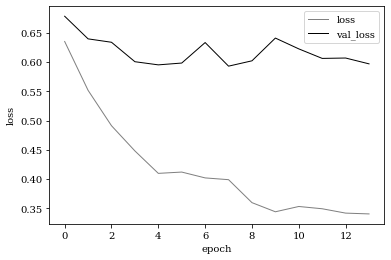

test_loss: 0.507, test_acc: 0.809
7人目
epoch: 1, loss: 0.642, acc: 0.654, val_loss: 0.564, val_acc: 0.725
epoch: 2, loss: 0.569, acc: 0.728, val_loss: 0.516, val_acc: 0.789
epoch: 3, loss: 0.528, acc: 0.774, val_loss: 0.498, val_acc: 0.810
epoch: 4, loss: 0.484, acc: 0.833, val_loss: 0.506, val_acc: 0.795
epoch: 5, loss: 0.468, acc: 0.840, val_loss: 0.511, val_acc: 0.790
epoch: 6, loss: 0.458, acc: 0.850, val_loss: 0.534, val_acc: 0.761
epoch: 7, loss: 0.452, acc: 0.857, val_loss: 0.504, val_acc: 0.800
epoch: 8, loss: 0.428, acc: 0.885, val_loss: 0.483, val_acc: 0.815
epoch: 9, loss: 0.403, acc: 0.914, val_loss: 0.487, val_acc: 0.801
epoch: 10, loss: 0.376, acc: 0.940, val_loss: 0.499, val_acc: 0.800
epoch: 11, loss: 0.364, acc: 0.954, val_loss: 0.53, val_acc: 0.768
epoch: 12, loss: 0.356, acc: 0.959, val_loss: 0.485, val_acc: 0.819
epoch: 13, loss: 0.343, acc: 0.973, val_loss: 0.508, val_acc: 0.792
epoch: 14, loss: 0.349, acc: 0.965, val_loss: 0.498, val_acc: 0.811
early stopping


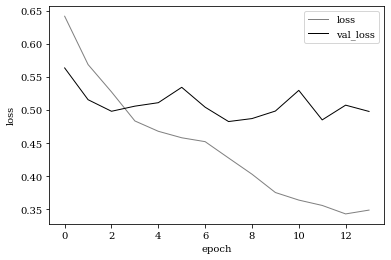

test_loss: 0.569, test_acc: 0.724
8人目
epoch: 1, loss: 0.665, acc: 0.586, val_loss: 0.629, val_acc: 0.657
epoch: 2, loss: 0.598, acc: 0.708, val_loss: 0.611, val_acc: 0.677
epoch: 3, loss: 0.538, acc: 0.778, val_loss: 0.583, val_acc: 0.708
epoch: 4, loss: 0.496, acc: 0.817, val_loss: 0.58, val_acc: 0.716
epoch: 5, loss: 0.459, acc: 0.853, val_loss: 0.588, val_acc: 0.702
epoch: 6, loss: 0.442, acc: 0.883, val_loss: 0.583, val_acc: 0.714
epoch: 7, loss: 0.451, acc: 0.857, val_loss: 0.615, val_acc: 0.684
epoch: 8, loss: 0.452, acc: 0.861, val_loss: 0.583, val_acc: 0.718
epoch: 9, loss: 0.432, acc: 0.884, val_loss: 0.582, val_acc: 0.715
epoch: 10, loss: 0.408, acc: 0.912, val_loss: 0.594, val_acc: 0.704
early stopping


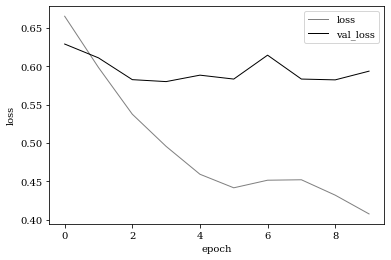

test_loss: 0.514, test_acc: 0.787
9人目
epoch: 1, loss: 0.648, acc: 0.619, val_loss: 0.588, val_acc: 0.721
epoch: 2, loss: 0.564, acc: 0.736, val_loss: 0.55, val_acc: 0.740
epoch: 3, loss: 0.503, acc: 0.812, val_loss: 0.553, val_acc: 0.735
epoch: 4, loss: 0.469, acc: 0.844, val_loss: 0.575, val_acc: 0.708
epoch: 5, loss: 0.437, acc: 0.883, val_loss: 0.574, val_acc: 0.715
epoch: 6, loss: 0.419, acc: 0.897, val_loss: 0.539, val_acc: 0.759
epoch: 7, loss: 0.407, acc: 0.913, val_loss: 0.554, val_acc: 0.738
epoch: 8, loss: 0.377, acc: 0.942, val_loss: 0.597, val_acc: 0.702
epoch: 9, loss: 0.374, acc: 0.943, val_loss: 0.563, val_acc: 0.740
epoch: 10, loss: 0.359, acc: 0.959, val_loss: 0.559, val_acc: 0.739
epoch: 11, loss: 0.355, acc: 0.963, val_loss: 0.564, val_acc: 0.726
epoch: 12, loss: 0.339, acc: 0.976, val_loss: 0.572, val_acc: 0.720
early stopping


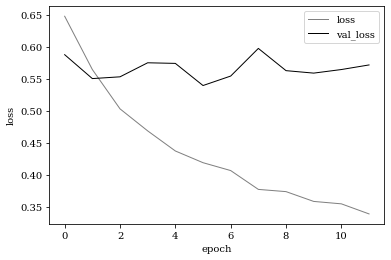

test_loss: 0.496, test_acc: 0.800
10人目
epoch: 1, loss: 0.647, acc: 0.645, val_loss: 0.632, val_acc: 0.657
epoch: 2, loss: 0.56, acc: 0.747, val_loss: 0.597, val_acc: 0.699
epoch: 3, loss: 0.497, acc: 0.832, val_loss: 0.586, val_acc: 0.718
epoch: 4, loss: 0.479, acc: 0.838, val_loss: 0.556, val_acc: 0.737
epoch: 5, loss: 0.467, acc: 0.839, val_loss: 0.569, val_acc: 0.726
epoch: 6, loss: 0.445, acc: 0.871, val_loss: 0.569, val_acc: 0.720
epoch: 7, loss: 0.404, acc: 0.913, val_loss: 0.602, val_acc: 0.681
epoch: 8, loss: 0.409, acc: 0.906, val_loss: 0.579, val_acc: 0.708
epoch: 9, loss: 0.409, acc: 0.903, val_loss: 0.578, val_acc: 0.714
epoch: 10, loss: 0.393, acc: 0.920, val_loss: 0.567, val_acc: 0.727
early stopping


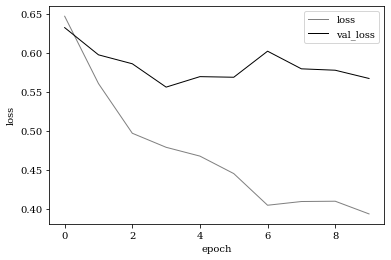

test_loss: 0.547, test_acc: 0.765
11人目
epoch: 1, loss: 0.647, acc: 0.636, val_loss: 0.582, val_acc: 0.702
epoch: 2, loss: 0.558, acc: 0.765, val_loss: 0.55, val_acc: 0.747
epoch: 3, loss: 0.503, acc: 0.802, val_loss: 0.556, val_acc: 0.741
epoch: 4, loss: 0.473, acc: 0.836, val_loss: 0.589, val_acc: 0.716
epoch: 5, loss: 0.449, acc: 0.865, val_loss: 0.552, val_acc: 0.751
epoch: 6, loss: 0.421, acc: 0.900, val_loss: 0.503, val_acc: 0.796
epoch: 7, loss: 0.419, acc: 0.900, val_loss: 0.542, val_acc: 0.750
epoch: 8, loss: 0.421, acc: 0.891, val_loss: 0.545, val_acc: 0.751
epoch: 9, loss: 0.407, acc: 0.905, val_loss: 0.601, val_acc: 0.683
epoch: 10, loss: 0.375, acc: 0.939, val_loss: 0.569, val_acc: 0.731
epoch: 11, loss: 0.357, acc: 0.960, val_loss: 0.541, val_acc: 0.751
epoch: 12, loss: 0.353, acc: 0.962, val_loss: 0.545, val_acc: 0.754
early stopping


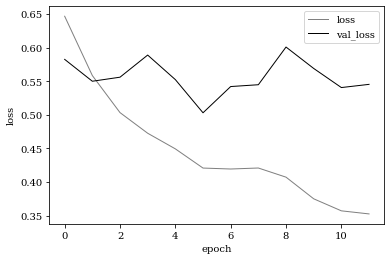

test_loss: 0.606, test_acc: 0.675
12人目
epoch: 1, loss: 0.655, acc: 0.641, val_loss: 0.571, val_acc: 0.706
epoch: 2, loss: 0.56, acc: 0.743, val_loss: 0.536, val_acc: 0.779
epoch: 3, loss: 0.519, acc: 0.789, val_loss: 0.504, val_acc: 0.797
epoch: 4, loss: 0.492, acc: 0.819, val_loss: 0.5, val_acc: 0.804
epoch: 5, loss: 0.475, acc: 0.829, val_loss: 0.542, val_acc: 0.749
epoch: 6, loss: 0.472, acc: 0.831, val_loss: 0.531, val_acc: 0.776
epoch: 7, loss: 0.427, acc: 0.897, val_loss: 0.5, val_acc: 0.806
epoch: 8, loss: 0.377, acc: 0.945, val_loss: 0.506, val_acc: 0.794
epoch: 9, loss: 0.361, acc: 0.959, val_loss: 0.52, val_acc: 0.783
epoch: 10, loss: 0.357, acc: 0.961, val_loss: 0.495, val_acc: 0.812
epoch: 11, loss: 0.359, acc: 0.959, val_loss: 0.507, val_acc: 0.800
epoch: 12, loss: 0.338, acc: 0.978, val_loss: 0.506, val_acc: 0.796
epoch: 13, loss: 0.329, acc: 0.987, val_loss: 0.49, val_acc: 0.821
epoch: 14, loss: 0.33, acc: 0.984, val_loss: 0.501, val_acc: 0.802
epoch: 15, loss: 0.322, ac

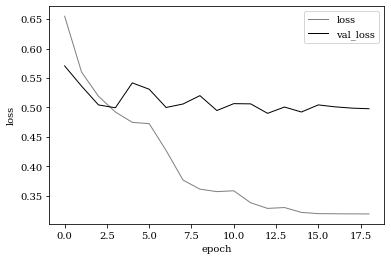

test_loss: 0.509, test_acc: 0.783
13人目
epoch: 1, loss: 0.633, acc: 0.647, val_loss: 0.609, val_acc: 0.660
epoch: 2, loss: 0.553, acc: 0.752, val_loss: 0.575, val_acc: 0.713
epoch: 3, loss: 0.501, acc: 0.809, val_loss: 0.567, val_acc: 0.729
epoch: 4, loss: 0.468, acc: 0.840, val_loss: 0.564, val_acc: 0.740
epoch: 5, loss: 0.446, acc: 0.871, val_loss: 0.565, val_acc: 0.733
epoch: 6, loss: 0.426, acc: 0.884, val_loss: 0.561, val_acc: 0.735
epoch: 7, loss: 0.405, acc: 0.908, val_loss: 0.575, val_acc: 0.713
epoch: 8, loss: 0.38, acc: 0.941, val_loss: 0.578, val_acc: 0.723
epoch: 9, loss: 0.361, acc: 0.957, val_loss: 0.552, val_acc: 0.745
epoch: 10, loss: 0.347, acc: 0.969, val_loss: 0.568, val_acc: 0.725
epoch: 11, loss: 0.342, acc: 0.977, val_loss: 0.569, val_acc: 0.724
epoch: 12, loss: 0.335, acc: 0.982, val_loss: 0.557, val_acc: 0.739
epoch: 13, loss: 0.327, acc: 0.988, val_loss: 0.561, val_acc: 0.736
epoch: 14, loss: 0.324, acc: 0.991, val_loss: 0.562, val_acc: 0.736
epoch: 15, loss: 0.

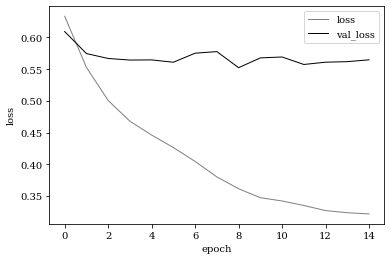

test_loss: 0.535, test_acc: 0.765
14人目
epoch: 1, loss: 0.646, acc: 0.633, val_loss: 0.61, val_acc: 0.684
epoch: 2, loss: 0.561, acc: 0.746, val_loss: 0.571, val_acc: 0.695
epoch: 3, loss: 0.503, acc: 0.810, val_loss: 0.541, val_acc: 0.762
epoch: 4, loss: 0.461, acc: 0.854, val_loss: 0.538, val_acc: 0.775
epoch: 5, loss: 0.449, acc: 0.862, val_loss: 0.553, val_acc: 0.738
epoch: 6, loss: 0.435, acc: 0.877, val_loss: 0.558, val_acc: 0.741
epoch: 7, loss: 0.43, acc: 0.884, val_loss: 0.546, val_acc: 0.758
epoch: 8, loss: 0.41, acc: 0.900, val_loss: 0.56, val_acc: 0.731
epoch: 9, loss: 0.383, acc: 0.931, val_loss: 0.55, val_acc: 0.742
epoch: 10, loss: 0.357, acc: 0.960, val_loss: 0.544, val_acc: 0.759
early stopping


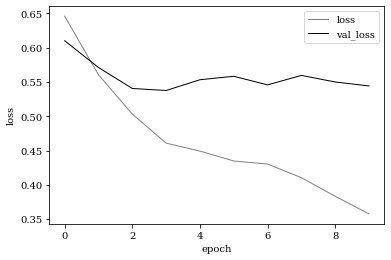

test_loss: 0.617, test_acc: 0.662
15人目
epoch: 1, loss: 0.64, acc: 0.657, val_loss: 0.599, val_acc: 0.693
epoch: 2, loss: 0.565, acc: 0.739, val_loss: 0.569, val_acc: 0.717
epoch: 3, loss: 0.528, acc: 0.777, val_loss: 0.582, val_acc: 0.723
epoch: 4, loss: 0.493, acc: 0.820, val_loss: 0.551, val_acc: 0.757
epoch: 5, loss: 0.453, acc: 0.855, val_loss: 0.538, val_acc: 0.760
epoch: 6, loss: 0.422, acc: 0.895, val_loss: 0.546, val_acc: 0.757
epoch: 7, loss: 0.41, acc: 0.906, val_loss: 0.57, val_acc: 0.720
epoch: 8, loss: 0.384, acc: 0.938, val_loss: 0.612, val_acc: 0.656
epoch: 9, loss: 0.402, acc: 0.909, val_loss: 0.551, val_acc: 0.754
epoch: 10, loss: 0.387, acc: 0.928, val_loss: 0.536, val_acc: 0.765
epoch: 11, loss: 0.372, acc: 0.943, val_loss: 0.58, val_acc: 0.710
epoch: 12, loss: 0.344, acc: 0.973, val_loss: 0.547, val_acc: 0.754
epoch: 13, loss: 0.335, acc: 0.980, val_loss: 0.549, val_acc: 0.750
epoch: 14, loss: 0.334, acc: 0.979, val_loss: 0.556, val_acc: 0.739
epoch: 15, loss: 0.332

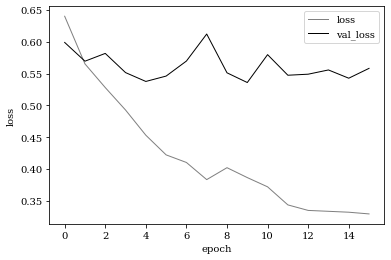

test_loss: 0.514, test_acc: 0.791
16人目
epoch: 1, loss: 0.646, acc: 0.604, val_loss: 0.6, val_acc: 0.687
epoch: 2, loss: 0.569, acc: 0.749, val_loss: 0.559, val_acc: 0.728
epoch: 3, loss: 0.513, acc: 0.794, val_loss: 0.538, val_acc: 0.761
epoch: 4, loss: 0.466, acc: 0.848, val_loss: 0.546, val_acc: 0.761
epoch: 5, loss: 0.46, acc: 0.848, val_loss: 0.551, val_acc: 0.743
epoch: 6, loss: 0.458, acc: 0.853, val_loss: 0.559, val_acc: 0.737
epoch: 7, loss: 0.438, acc: 0.878, val_loss: 0.519, val_acc: 0.783
epoch: 8, loss: 0.397, acc: 0.923, val_loss: 0.556, val_acc: 0.744
epoch: 9, loss: 0.367, acc: 0.953, val_loss: 0.529, val_acc: 0.773
epoch: 10, loss: 0.353, acc: 0.961, val_loss: 0.512, val_acc: 0.797
epoch: 11, loss: 0.344, acc: 0.969, val_loss: 0.543, val_acc: 0.754
epoch: 12, loss: 0.332, acc: 0.984, val_loss: 0.531, val_acc: 0.764
epoch: 13, loss: 0.327, acc: 0.988, val_loss: 0.535, val_acc: 0.773
epoch: 14, loss: 0.323, acc: 0.992, val_loss: 0.526, val_acc: 0.771
epoch: 15, loss: 0.32

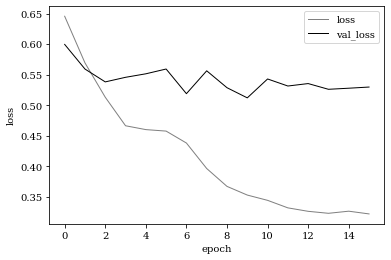

test_loss: 0.474, test_acc: 0.838
17人目
epoch: 1, loss: 0.638, acc: 0.629, val_loss: 0.599, val_acc: 0.689
epoch: 2, loss: 0.539, acc: 0.773, val_loss: 0.614, val_acc: 0.672
epoch: 3, loss: 0.489, acc: 0.821, val_loss: 0.593, val_acc: 0.706
epoch: 4, loss: 0.469, acc: 0.840, val_loss: 0.582, val_acc: 0.718
epoch: 5, loss: 0.449, acc: 0.864, val_loss: 0.563, val_acc: 0.744
epoch: 6, loss: 0.442, acc: 0.869, val_loss: 0.56, val_acc: 0.741
epoch: 7, loss: 0.433, acc: 0.879, val_loss: 0.632, val_acc: 0.634
epoch: 8, loss: 0.408, acc: 0.903, val_loss: 0.587, val_acc: 0.703
epoch: 9, loss: 0.383, acc: 0.937, val_loss: 0.548, val_acc: 0.747
epoch: 10, loss: 0.373, acc: 0.941, val_loss: 0.564, val_acc: 0.738
epoch: 11, loss: 0.355, acc: 0.962, val_loss: 0.589, val_acc: 0.702
epoch: 12, loss: 0.344, acc: 0.975, val_loss: 0.543, val_acc: 0.758
epoch: 13, loss: 0.346, acc: 0.971, val_loss: 0.605, val_acc: 0.688
epoch: 14, loss: 0.342, acc: 0.973, val_loss: 0.552, val_acc: 0.734
epoch: 15, loss: 0.

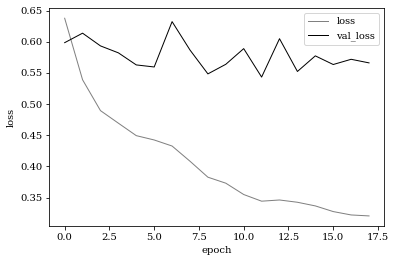

test_loss: 0.626, test_acc: 0.679
18人目
epoch: 1, loss: 0.627, acc: 0.651, val_loss: 0.629, val_acc: 0.651
epoch: 2, loss: 0.554, acc: 0.755, val_loss: 0.59, val_acc: 0.690
epoch: 3, loss: 0.516, acc: 0.793, val_loss: 0.537, val_acc: 0.749
epoch: 4, loss: 0.479, acc: 0.832, val_loss: 0.541, val_acc: 0.777
epoch: 5, loss: 0.467, acc: 0.838, val_loss: 0.548, val_acc: 0.744
epoch: 6, loss: 0.458, acc: 0.851, val_loss: 0.545, val_acc: 0.751
epoch: 7, loss: 0.414, acc: 0.905, val_loss: 0.546, val_acc: 0.752
epoch: 8, loss: 0.385, acc: 0.932, val_loss: 0.539, val_acc: 0.760
epoch: 9, loss: 0.376, acc: 0.945, val_loss: 0.552, val_acc: 0.749
early stopping


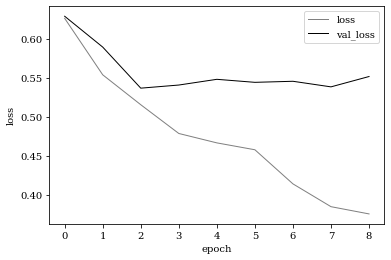

test_loss: 0.523, test_acc: 0.776
19人目
epoch: 1, loss: 0.633, acc: 0.647, val_loss: 0.663, val_acc: 0.602
epoch: 2, loss: 0.57, acc: 0.725, val_loss: 0.621, val_acc: 0.636
epoch: 3, loss: 0.533, acc: 0.776, val_loss: 0.601, val_acc: 0.696
epoch: 4, loss: 0.506, acc: 0.800, val_loss: 0.563, val_acc: 0.744
epoch: 5, loss: 0.482, acc: 0.824, val_loss: 0.572, val_acc: 0.722
epoch: 6, loss: 0.458, acc: 0.851, val_loss: 0.617, val_acc: 0.671
epoch: 7, loss: 0.476, acc: 0.824, val_loss: 0.56, val_acc: 0.739
epoch: 8, loss: 0.421, acc: 0.897, val_loss: 0.548, val_acc: 0.753
epoch: 9, loss: 0.387, acc: 0.936, val_loss: 0.562, val_acc: 0.733
epoch: 10, loss: 0.371, acc: 0.949, val_loss: 0.555, val_acc: 0.752
epoch: 11, loss: 0.355, acc: 0.965, val_loss: 0.555, val_acc: 0.749
epoch: 12, loss: 0.357, acc: 0.960, val_loss: 0.551, val_acc: 0.755
epoch: 13, loss: 0.352, acc: 0.966, val_loss: 0.551, val_acc: 0.754
epoch: 14, loss: 0.347, acc: 0.971, val_loss: 0.555, val_acc: 0.749
early stopping


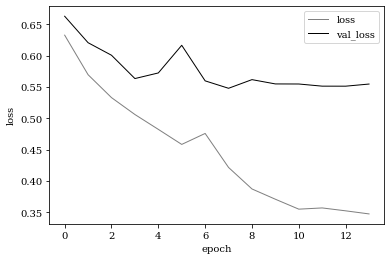

test_loss: 0.471, test_acc: 0.841
20人目
epoch: 1, loss: 0.652, acc: 0.630, val_loss: 0.582, val_acc: 0.713
epoch: 2, loss: 0.555, acc: 0.750, val_loss: 0.54, val_acc: 0.754
epoch: 3, loss: 0.495, acc: 0.822, val_loss: 0.534, val_acc: 0.761
epoch: 4, loss: 0.459, acc: 0.858, val_loss: 0.538, val_acc: 0.762
epoch: 5, loss: 0.457, acc: 0.853, val_loss: 0.547, val_acc: 0.766
epoch: 6, loss: 0.423, acc: 0.891, val_loss: 0.542, val_acc: 0.752
epoch: 7, loss: 0.402, acc: 0.914, val_loss: 0.554, val_acc: 0.748
epoch: 8, loss: 0.379, acc: 0.942, val_loss: 0.547, val_acc: 0.742
epoch: 9, loss: 0.361, acc: 0.957, val_loss: 0.545, val_acc: 0.750
early stopping


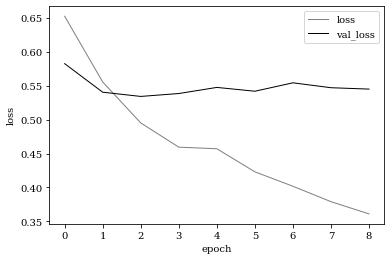

test_loss: 0.496, test_acc: 0.807
21人目
epoch: 1, loss: 0.65, acc: 0.614, val_loss: 0.589, val_acc: 0.682
epoch: 2, loss: 0.579, acc: 0.727, val_loss: 0.559, val_acc: 0.732
epoch: 3, loss: 0.532, acc: 0.783, val_loss: 0.547, val_acc: 0.739
epoch: 4, loss: 0.497, acc: 0.811, val_loss: 0.606, val_acc: 0.682
epoch: 5, loss: 0.492, acc: 0.813, val_loss: 0.539, val_acc: 0.753
epoch: 6, loss: 0.456, acc: 0.856, val_loss: 0.545, val_acc: 0.746
epoch: 7, loss: 0.424, acc: 0.897, val_loss: 0.52, val_acc: 0.785
epoch: 8, loss: 0.426, acc: 0.887, val_loss: 0.529, val_acc: 0.767
epoch: 9, loss: 0.403, acc: 0.909, val_loss: 0.593, val_acc: 0.703
epoch: 10, loss: 0.394, acc: 0.921, val_loss: 0.558, val_acc: 0.747
epoch: 11, loss: 0.371, acc: 0.942, val_loss: 0.542, val_acc: 0.743
epoch: 12, loss: 0.363, acc: 0.952, val_loss: 0.543, val_acc: 0.758
epoch: 13, loss: 0.349, acc: 0.967, val_loss: 0.566, val_acc: 0.735
early stopping


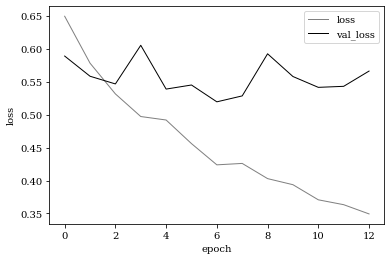

test_loss: 0.455, test_acc: 0.851
22人目
epoch: 1, loss: 0.672, acc: 0.610, val_loss: 0.638, val_acc: 0.639
epoch: 2, loss: 0.592, acc: 0.699, val_loss: 0.598, val_acc: 0.702
epoch: 3, loss: 0.513, acc: 0.817, val_loss: 0.563, val_acc: 0.724
epoch: 4, loss: 0.468, acc: 0.846, val_loss: 0.571, val_acc: 0.724
epoch: 5, loss: 0.471, acc: 0.833, val_loss: 0.566, val_acc: 0.733
epoch: 6, loss: 0.432, acc: 0.883, val_loss: 0.555, val_acc: 0.756
epoch: 7, loss: 0.402, acc: 0.917, val_loss: 0.571, val_acc: 0.723
epoch: 8, loss: 0.397, acc: 0.922, val_loss: 0.558, val_acc: 0.737
epoch: 9, loss: 0.385, acc: 0.929, val_loss: 0.572, val_acc: 0.724
epoch: 10, loss: 0.389, acc: 0.920, val_loss: 0.566, val_acc: 0.737
epoch: 11, loss: 0.393, acc: 0.919, val_loss: 0.559, val_acc: 0.744
epoch: 12, loss: 0.365, acc: 0.949, val_loss: 0.575, val_acc: 0.715
early stopping


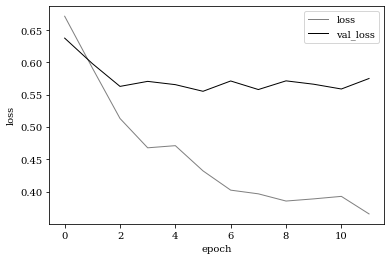

test_loss: 0.485, test_acc: 0.797
23人目
epoch: 1, loss: 0.623, acc: 0.658, val_loss: 0.733, val_acc: 0.566
epoch: 2, loss: 0.57, acc: 0.730, val_loss: 0.654, val_acc: 0.581
epoch: 3, loss: 0.524, acc: 0.786, val_loss: 0.582, val_acc: 0.740
epoch: 4, loss: 0.488, acc: 0.823, val_loss: 0.589, val_acc: 0.709
epoch: 5, loss: 0.461, acc: 0.852, val_loss: 0.567, val_acc: 0.737
epoch: 6, loss: 0.43, acc: 0.887, val_loss: 0.593, val_acc: 0.708
epoch: 7, loss: 0.431, acc: 0.878, val_loss: 0.588, val_acc: 0.707
epoch: 8, loss: 0.415, acc: 0.901, val_loss: 0.562, val_acc: 0.740
epoch: 9, loss: 0.406, acc: 0.909, val_loss: 0.558, val_acc: 0.742
epoch: 10, loss: 0.381, acc: 0.940, val_loss: 0.582, val_acc: 0.707
epoch: 11, loss: 0.37, acc: 0.946, val_loss: 0.591, val_acc: 0.706
epoch: 12, loss: 0.366, acc: 0.949, val_loss: 0.561, val_acc: 0.748
epoch: 13, loss: 0.363, acc: 0.950, val_loss: 0.565, val_acc: 0.719
epoch: 14, loss: 0.349, acc: 0.968, val_loss: 0.568, val_acc: 0.723
epoch: 15, loss: 0.33

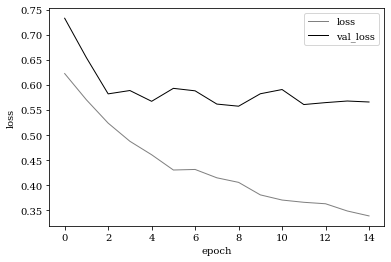

test_loss: 0.555, test_acc: 0.764
24人目
epoch: 1, loss: 0.617, acc: 0.681, val_loss: 0.649, val_acc: 0.602
epoch: 2, loss: 0.547, acc: 0.764, val_loss: 0.58, val_acc: 0.719
epoch: 3, loss: 0.489, acc: 0.824, val_loss: 0.564, val_acc: 0.738
epoch: 4, loss: 0.448, acc: 0.873, val_loss: 0.572, val_acc: 0.726
epoch: 5, loss: 0.432, acc: 0.885, val_loss: 0.622, val_acc: 0.664
epoch: 6, loss: 0.423, acc: 0.891, val_loss: 0.614, val_acc: 0.691
epoch: 7, loss: 0.469, acc: 0.837, val_loss: 0.58, val_acc: 0.724
epoch: 8, loss: 0.407, acc: 0.905, val_loss: 0.582, val_acc: 0.703
epoch: 9, loss: 0.374, acc: 0.947, val_loss: 0.583, val_acc: 0.703
early stopping


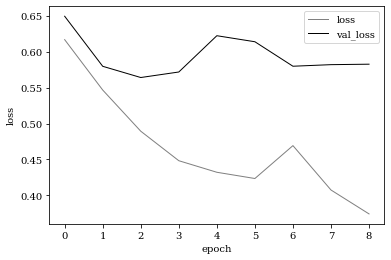

test_loss: 0.696, test_acc: 0.590
25人目
epoch: 1, loss: 0.639, acc: 0.626, val_loss: 0.629, val_acc: 0.646
epoch: 2, loss: 0.567, acc: 0.741, val_loss: 0.591, val_acc: 0.687
epoch: 3, loss: 0.522, acc: 0.798, val_loss: 0.574, val_acc: 0.717
epoch: 4, loss: 0.486, acc: 0.821, val_loss: 0.573, val_acc: 0.721
epoch: 5, loss: 0.462, acc: 0.850, val_loss: 0.567, val_acc: 0.724
epoch: 6, loss: 0.438, acc: 0.876, val_loss: 0.564, val_acc: 0.734
epoch: 7, loss: 0.413, acc: 0.903, val_loss: 0.549, val_acc: 0.742
epoch: 8, loss: 0.416, acc: 0.898, val_loss: 0.557, val_acc: 0.739
epoch: 9, loss: 0.398, acc: 0.917, val_loss: 0.627, val_acc: 0.676
epoch: 10, loss: 0.399, acc: 0.914, val_loss: 0.558, val_acc: 0.731
epoch: 11, loss: 0.379, acc: 0.937, val_loss: 0.576, val_acc: 0.725
epoch: 12, loss: 0.359, acc: 0.957, val_loss: 0.573, val_acc: 0.705
epoch: 13, loss: 0.347, acc: 0.967, val_loss: 0.579, val_acc: 0.720
early stopping


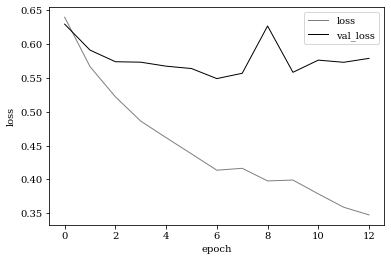

test_loss: 0.716, test_acc: 0.576
26人目
epoch: 1, loss: 0.636, acc: 0.651, val_loss: 0.588, val_acc: 0.697
epoch: 2, loss: 0.545, acc: 0.762, val_loss: 0.534, val_acc: 0.758
epoch: 3, loss: 0.509, acc: 0.792, val_loss: 0.535, val_acc: 0.758
epoch: 4, loss: 0.467, acc: 0.843, val_loss: 0.569, val_acc: 0.730
epoch: 5, loss: 0.449, acc: 0.867, val_loss: 0.511, val_acc: 0.794
epoch: 6, loss: 0.431, acc: 0.884, val_loss: 0.525, val_acc: 0.777
epoch: 7, loss: 0.391, acc: 0.926, val_loss: 0.532, val_acc: 0.766
epoch: 8, loss: 0.373, acc: 0.947, val_loss: 0.536, val_acc: 0.759
epoch: 9, loss: 0.38, acc: 0.934, val_loss: 0.543, val_acc: 0.754
epoch: 10, loss: 0.384, acc: 0.934, val_loss: 0.536, val_acc: 0.753
epoch: 11, loss: 0.364, acc: 0.955, val_loss: 0.568, val_acc: 0.733
early stopping


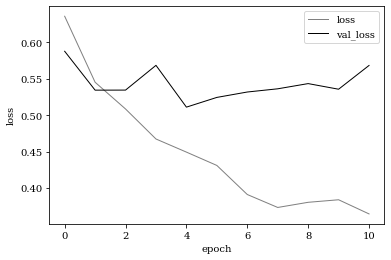

test_loss: 0.608, test_acc: 0.686
27人目
epoch: 1, loss: 0.625, acc: 0.649, val_loss: 0.544, val_acc: 0.762
epoch: 2, loss: 0.541, acc: 0.763, val_loss: 0.554, val_acc: 0.738
epoch: 3, loss: 0.495, acc: 0.814, val_loss: 0.579, val_acc: 0.711
epoch: 4, loss: 0.469, acc: 0.849, val_loss: 0.617, val_acc: 0.677
epoch: 5, loss: 0.478, acc: 0.824, val_loss: 0.614, val_acc: 0.682
epoch: 6, loss: 0.462, acc: 0.849, val_loss: 0.529, val_acc: 0.760
epoch: 7, loss: 0.437, acc: 0.877, val_loss: 0.55, val_acc: 0.743
epoch: 8, loss: 0.401, acc: 0.916, val_loss: 0.517, val_acc: 0.780
epoch: 9, loss: 0.358, acc: 0.964, val_loss: 0.525, val_acc: 0.771
epoch: 10, loss: 0.343, acc: 0.977, val_loss: 0.529, val_acc: 0.773
epoch: 11, loss: 0.337, acc: 0.980, val_loss: 0.535, val_acc: 0.751
epoch: 12, loss: 0.335, acc: 0.982, val_loss: 0.536, val_acc: 0.757
epoch: 13, loss: 0.334, acc: 0.982, val_loss: 0.53, val_acc: 0.773
epoch: 14, loss: 0.332, acc: 0.984, val_loss: 0.549, val_acc: 0.750
early stopping


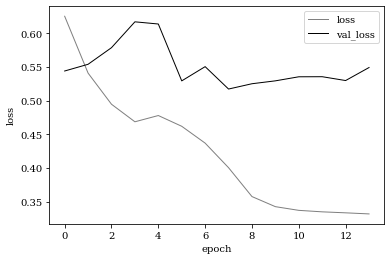

test_loss: 0.569, test_acc: 0.739
28人目
epoch: 1, loss: 0.628, acc: 0.643, val_loss: 0.593, val_acc: 0.709
epoch: 2, loss: 0.53, acc: 0.770, val_loss: 0.564, val_acc: 0.734
epoch: 3, loss: 0.485, acc: 0.829, val_loss: 0.569, val_acc: 0.722
epoch: 4, loss: 0.46, acc: 0.850, val_loss: 0.603, val_acc: 0.684
epoch: 5, loss: 0.458, acc: 0.846, val_loss: 0.558, val_acc: 0.725
epoch: 6, loss: 0.446, acc: 0.866, val_loss: 0.551, val_acc: 0.739
epoch: 7, loss: 0.44, acc: 0.868, val_loss: 0.554, val_acc: 0.733
epoch: 8, loss: 0.396, acc: 0.921, val_loss: 0.552, val_acc: 0.746
epoch: 9, loss: 0.372, acc: 0.946, val_loss: 0.538, val_acc: 0.753
epoch: 10, loss: 0.364, acc: 0.952, val_loss: 0.552, val_acc: 0.744
epoch: 11, loss: 0.349, acc: 0.966, val_loss: 0.549, val_acc: 0.750
epoch: 12, loss: 0.341, acc: 0.975, val_loss: 0.544, val_acc: 0.746
epoch: 13, loss: 0.339, acc: 0.976, val_loss: 0.54, val_acc: 0.754
epoch: 14, loss: 0.331, acc: 0.984, val_loss: 0.541, val_acc: 0.753
epoch: 15, loss: 0.327

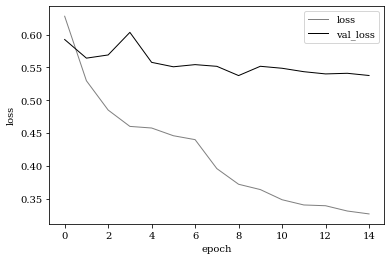

test_loss: 0.584, test_acc: 0.738


In [62]:
FILE_PATH = "/home/r-yanagimoto/Hazumi1902/dumpfiles/*.csv"
files = glob.glob(FILE_PATH)

test_preds = []
test_ans = []

i = 0

for testfile in files:
    i += 1
    print(f'{i}人目')
    train_df, test_df = louocv(files, testfile)

    train_data = clean(train_df)
    train_target = make_target(train_df)


    test_data = clean(test_df)
    test_target = make_target(test_df)
    test_ans = test_ans + test_target[0].values.tolist()

    x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, shuffle=True)

    scaler = make_scaler(x_train)
    x_train = standardize(x_train, scaler) 
    x_valid = standardize(x_valid, scaler) 
    test_data = standardize(test_data, scaler)

    model = BiRNN(100) 


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), amsgrad=True)

    def compute_loss(t, y):
        return criterion(y, t)

    def train_step(x, t):
        model.train()
        preds = model(x)
        loss = compute_loss(t, preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss, preds

    def val_step(x, t):
        model.eval()
        preds = model(x)
        loss = criterion(preds, t)

        return loss, preds

    # エポック数
    epochs = 200
    hist = {'loss': [], 'accuracy': [],
            'val_loss': [], 'val_accuracy': []}
    es = EarlyStopping(patience=5, verbose=1)

    for epoch in range(epochs):
        train_loss = 0. 
        train_acc = 0. 
        val_loss = 0. 
        val_acc = 0. 

        for (x, t) in zip(x_train, y_train):
            x = torch.tensor(x)
            t = torch.tensor(t)
            loss, preds = train_step(x, t) 
            train_loss += loss.item() 
            train_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        train_loss /= len(x_train) 
        train_acc /= len(x_train) 

        for (x, t) in zip(x_valid, y_valid):
            x = torch.tensor(x) 
            t = torch.tensor(t)
            loss, preds = val_step(x, t) 
            val_loss += loss.item() 
            val_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        val_loss /= len(x_valid) 
        val_acc /= len(x_valid)

        hist['loss'].append(train_loss) 
        hist['accuracy'].append(train_acc) 
        hist['val_loss'].append(val_loss) 
        hist['val_accuracy'].append(val_acc) 

        print('epoch: {}, loss: {:.3}, acc: {:.3f}, val_loss: {:.3}, val_acc: {:.3f}'.format(epoch+1, train_loss, train_acc, val_loss, val_acc))

        if es(val_loss):
            break
    
    # モデルの評価
    loss = hist['loss'] 
    val_loss = hist['val_loss'] 

    fig = plt.figure() 
    plt.rc('font', family='serif') 
    plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss') 
    plt.plot(range(len(val_loss)), val_loss, color='black', linewidth=1, label='val_loss') 
    plt.xlabel('epoch') 
    plt.ylabel('loss') 
    plt.legend() 
    plt.show() 

    # テストデータの評価
    def test_step(x, t):
        return val_step(x, t) 

    test_loss = 0.
    test_acc = 0. 

    for (x, t) in zip(test_data, test_target):
        x = torch.tensor(x) 
        t = torch.tensor(t)
        loss, preds = test_step(x, t) 
        test_loss += loss.item() 
        test_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 
        test_preds += preds.argmax(dim=-1).tolist()
    
    print('test_loss: {:.3f}, test_acc: {:.3f}'.format(test_loss, test_acc))

In [63]:
print(classification_report(test_ans, test_preds))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       816
           1       0.80      0.81      0.81      1521

    accuracy                           0.75      2337
   macro avg       0.72      0.72      0.72      2337
weighted avg       0.75      0.75      0.75      2337



In [64]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(test_ans, test_preds))

0.7462558836114677


In [47]:
type(test_ans)

list